In [168]:
import sys
import math
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

k = 0.13 # best k I've found for part1.1
sys.setrecursionlimit(1500)

In [169]:
def inputDigit(name="digitdata/trainingimages"):
    with open(name) as digitTxt:
        image = [list(line)[0:28] for line in digitTxt]
        rows = len(image)
    return image

In [170]:
digitImage = inputDigit()
print(len(digitImage))
print(len(digitImage[139999]))

140000
28


In [171]:
import collections

def readRough(name="digitdata/traininglabels"):
    with open(name) as label:
        labels = []
        for line in label:
            labels.append(line[0])
    return labels


In [172]:
label = readRough()
print (len(label))
#print sorted(collections.Counter(label).items())
class_ = sorted(collections.Counter(label).items())
#print (class_)
with open('labelstats.txt', 'wb') as fp:
    pickle.dump(class_, fp)

5000


In [173]:
with open ('labelstats.txt', 'rb') as fp:
    class_ = pickle.load(fp)

digitImage = inputDigit()
training0=np.zeros(shape=(10, 28, 28))
training1=np.zeros(shape=(10, 28, 28))

count = 0
for i in range(5000):
    for row in range(28):
        for col in range(28):
            if digitImage[i*28 + row][col] == ' ':
                training1[int(label[i])][row][col] += 0
                training0[int(label[i])][row][col] += 1
            else:
                training1[int(label[i])][row][col] += 1
                training0[int(label[i])][row][col] += 0

for i in range(10):
    training1[i] = (training1[i] + k) / (class_[i][1] + k * 2)
    training0[i] = (training0[i] + k) / (class_[i][1] + k * 2)
#print(training0[0][0])
#print(training1[0][0])



In [174]:
# log P(class) + log P(f1,1 | class) + log P(f1,2 | class) + ... + log P(f28,28 | class)

test_rough = inputDigit(name = "digitdata/testimages")

answer = np.zeros(1000)
for i in range(1000):
    test_image = np.zeros(shape=(28,28))
    for row in range(28):
        for col in range(28):
            if test_rough[i*28+row][col] == ' ':
                test_image[row][col] = 0
            else:
                test_image[row][col] = 1
             
    posteriori = np.zeros(10)
    for class_num in range(10):
        posteriori[class_num] = math.log(class_[class_num][1])
        for row in range(28):
            for col in range(28):
                if test_image[row][col] == 0:
                    posteriori[class_num] += math.log(training0[class_num][row][col])
                else:
                    posteriori[class_num] += math.log(training1[class_num][row][col] )   
    answer[i] = np.argmax(posteriori)
    #print(posteriori)
    
#print(answer)



In [175]:
testlabels = readRough("digitdata/testlabels")


In [176]:
def confusion_matrix():
    num_each_class = np.zeros(10)
    conf_matrix = np.zeros(shape=(10,10))
    for i in range(1000):
        conf_matrix[int(testlabels[i])][int(answer[i])] += 1
        num_each_class[int(testlabels[i])] += 1
            
    for i in range(10):
        for j in range(10):
            conf_matrix[i][j] /= num_each_class[i]
    
    return conf_matrix

In [177]:
conf_matrix = confusion_matrix()
conf_matrix = np.around(conf_matrix, 2)
for row in conf_matrix:
    print(row)
diag_sum = 0
for i in range(10):
    diag_sum += conf_matrix[i][i]
print(diag_sum)

[ 0.84  0.    0.01  0.    0.01  0.06  0.03  0.    0.04  0.  ]
[ 0.    0.96  0.01  0.    0.    0.02  0.01  0.    0.    0.  ]
[ 0.01  0.03  0.79  0.04  0.02  0.    0.06  0.01  0.05  0.  ]
[ 0.    0.01  0.    0.8   0.    0.03  0.02  0.07  0.01  0.06]
[ 0.    0.    0.01  0.    0.76  0.01  0.03  0.01  0.02  0.17]
[ 0.02  0.01  0.01  0.13  0.03  0.68  0.01  0.01  0.02  0.07]
[ 0.01  0.04  0.04  0.    0.04  0.07  0.77  0.    0.02  0.  ]
[ 0.    0.06  0.03  0.    0.03  0.    0.    0.73  0.03  0.13]
[ 0.01  0.01  0.03  0.14  0.03  0.08  0.    0.01  0.6   0.1 ]
[ 0.01  0.01  0.    0.03  0.1   0.02  0.    0.02  0.01  0.8 ]
7.73


In [178]:
# find pairs with highest confusion rate
conf_copy = conf_matrix.copy()
for i in range(10):
    m = np.argmax(conf_copy)
    conf_copy[int(m/10)][m%10] = 0
#print(conf_copy)
print("most confused digits pairs:")
for i in range(4):
    m = np.argmax(conf_copy)
    print(str(int(m/10)) + ',' + str(m%10))
    conf_copy[int(m/10)][m%10] = 0

most confused digits pairs:
4,9
8,3
5,3
7,9


In [239]:
def plot_likelihood(num):
    x_arr = np.linspace(0, 27, 28)
    y_arr = np.linspace(0, 27, 28)

    x,y = np.meshgrid(x_arr,y_arr)
    z = training1[num].copy()
    for i in range(28):
        for j in range(14):
            temp = z[i][j]
            z[i][j] = z[i][27-j]
            z[i][27-j] = temp

    plt.pcolormesh(x,27-y,z,cmap=plt.cm.jet_r)
    plt.colorbar()
    plt.show()


In [248]:
def plot_odds_ratio(a,b):
    x_arr = np.linspace(0, 27, 28)
    y_arr = np.linspace(0, 27, 28)

    x,y = np.meshgrid(x_arr,y_arr)
    z = training1[a].copy()
    
    for i in range(28):
        for j in range(28):
            z[i][j] = math.log(z[i][j])
            z[i][j] /= math.log(training1[b][i][j])
            
    for i in range(28):
        for j in range(14):
            temp = z[i][j]
            z[i][j] = z[i][27-j]
            z[i][27-j] = temp

    plt.pcolormesh(x,27-y,z,cmap=plt.cm.jet_r)
    plt.colorbar()
    plt.show()



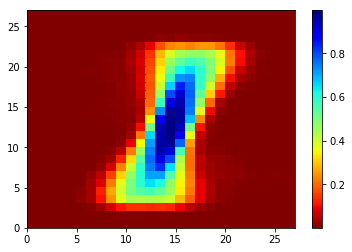

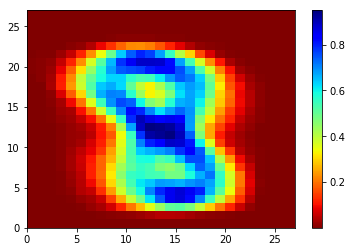

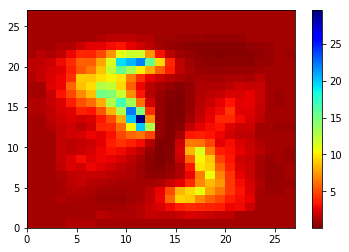

In [250]:
plot_likelihood(1)
plot_likelihood(8)


plot_odds_ratio(1,8)

